Automatic Essay Scoring System RN

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('stopwords')

nltk version: 3.7
Python 3.8.16


Load Corpus 

In [ ]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("ETS_corpus_F22.csv")

Designed Features 

*1. Features - Organizations - Paragraphs Count*

In [ ]:
def paragraphs_count (text):
  paragraphs = text.split('\n\n') 
  paragraphs_count = len(paragraphs)
  if paragraphs_count == 1:
    paragraphs_count = len(text.split ('\n'))
  return paragraphs_count

In [ ]:
t = data.iloc[0]['text']
print(t)
paragraphs_count(t)

Some people might think that traveling in a group led by a tour guide is a good way. But, a group tour normally has its strict schedule and does not offer the tourists in group any chance to meet many people in new place. 
So, I strongly disagree with the statement that the best way to travel is in a group led by a tour guide. 

First, a group tour has its own strict schedule and all the tour team members should follow it. And it means that I can not choose the place where I want go and the food which I want to eat. For example, when I went to Thailand for the first time, I chose a group tour because I was young and it was the first time to go abroad. I really wanted to go many attractive shops and spots in the street in Bangkok, but I couldn't go there because I was in a group tour and I had to follow the schedule which the tour company offered. And I had to wake up early in the morning and had to go back to hotel in early evening, even though I wanted to enjoy more sleep in the bed i

4

In [ ]:
data['paragraphs_count'] = data['text'].apply(paragraphs_count)
data.head()

,label,text,paragraphs_count
0,high,Some people might think that traveling in a gr...,4
1,medium,IThe importance and popularity of travelling i...,2
2,high,"It is an important decision, how to plan your ...",4
3,medium,Some people believe that young people can enjo...,6
4,medium,Travelling is usually considered as good recr...,6


*2. Features - Lexical Complexity - Average Word Length*

In [ ]:
def average_word_length(text):
  text_length = len(text)
  tokens = len(text.split())
  AWL = text_length/tokens
  return AWL

In [ ]:
t = data.iloc[2]['text']
print(t)
average_word_length(t)


It is an important decision, how to plan your syllabus. Some students prefer to take a lot of courses and expand their knowledge, whereas some other prefer to specialize in one specific subject. In this essay I will dwell on the advantages of specializing in one subject and argue in its favor.
There are at least three reasons why choosing one subject is better than trying to keep balance between many subjects. The first and most important reason for me is that this way people concentrate on one thing and do not feel anxiety about time-management and deadlines. In contrast, student who take three or four subjects are very busy and stressed, because they have to prepare for many exams and see different lecturers, which is confusing and the results are not as good as those of the ones from the one subject plan. In addition, when one specializes in one subject then this person has more chances to be well-informed about it and do his best, being sure he recieves the best knowledge and inves

5.616666666666666

In [ ]:
data['average_word_length'] = data['text'].apply(average_word_length)
data.head()

,label,text,paragraphs_count,average_word_length
0,high,Some people might think that traveling in a gr...,4,5.052083
1,medium,IThe importance and popularity of travelling i...,2,5.124611
2,high,"It is an important decision, how to plan your ...",4,5.616667
3,medium,Some people believe that young people can enjo...,6,5.449568
4,medium,Travelling is usually considered as good recr...,6,5.335244


*3. Feature - Grammar - Perfect Aspect Pattern*

In [ ]:
import spacy

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
from spacy.matcher import Matcher
import math

In [ ]:
nlp = spacy.load('en_core_web_sm', disable = ['textcat'])
def Have_PP (x):
  doc = nlp(x)
  matcher = Matcher(nlp.vocab)
  pattern1 = [{'LEMMA':'have'},{'LEMMA': 'not', 'OP': '?'}, {'POS': 'ADV', 'OP': '?'}, {'TAG': 'VBN'}]

  matcher.add("AUX", [pattern1])
  matches = matcher(doc, as_spans=True)
  log_result = math.log((len(matches)+1)/len(x))
  return log_result

data['Have_PP'] = data['text'].apply(Have_PP)

In [ ]:
# import math
# def log_x_plus_one(x):
#   return math.log(x+1/len(text))

In [ ]:
# data['Have_PP_Positive'] = data['text'].apply(Have_PP)

In [ ]:
t = data.iloc[349]['text']
print(t)
Have_PP(t)


There can be different opinions of this statement.
There are young people nowadays do to give enough time to helping their communities because they have a freetime who they can utilize to helping the comminities,maybe they do it because they want help the nex generations to live in beautiful and wonderfull communities.In many case the parents can their children to enter in a word that it is that to help the persons less well.
There are young people nowaday do not give enough time to helping their communities because they have not freetime or because they don"t want to help nobodyes.They want to live nothing never problem and so they don"t help the next generations.



-6.513230110912307

In [ ]:
data.head()

,label,text,paragraphs_count,average_word_length,Have_PP
0,high,Some people might think that traveling in a gr...,4,5.052083,-7.570443
1,medium,IThe importance and popularity of travelling i...,2,5.124611,-7.405496
2,high,"It is an important decision, how to plan your ...",4,5.616667,-6.918695
3,medium,Some people believe that young people can enjo...,6,5.449568,-6.851714
4,medium,Travelling is usually considered as good recr...,6,5.335244,-6.430794


*4. Features - Grammar - Perfect Aspect Error *

In [ ]:
nlp = spacy.load('en_core_web_sm', disable = ['textcat'])
def Have_PP_Error (x):
  doc = nlp(x)
  matcher = Matcher(nlp.vocab)
  pattern1 = [{'LEMMA':'have'},{'LEMMA': 'not', 'OP': '?'}, {'POS': 'ADV', 'OP': '?'}, {'TAG': 'VB'}]

  matcher.add("AUX", [pattern1])
  matches = matcher(doc, as_spans=True)
  log_result = math.log((len(matches)+1)/len(x))

  return log_result

data['Have_PP_Error'] = data['text'].apply(Have_PP_Error)
data.head()

,label,text,paragraphs_count,average_word_length,Have_PP,Have_PP_Error
0,high,Some people might think that traveling in a gr...,4,5.052083,-7.570443,-7.570443
1,medium,IThe importance and popularity of travelling i...,2,5.124611,-7.405496,-7.405496
2,high,"It is an important decision, how to plan your ...",4,5.616667,-6.918695,-7.611842
3,medium,Some people believe that young people can enjo...,6,5.449568,-6.851714,-7.544861
4,medium,Travelling is usually considered as good recr...,6,5.335244,-6.430794,-7.529406


In [ ]:
# data['Have_PP_Error_Log'] = data['Have_PP_Error'].apply(log_x_plus_one)
# data.head()



*5. Features - Usage - Proportion of Punctuation*

In [ ]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

In [ ]:

print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
t = data.iloc[7]['text']
print(t)
count_punct(t)

I thing the statement ''Young people nowadays do not give enough time to helping thier communities" is wrong and right. You have to look at all aspect this statement give us. 
On one hand existing enough people who do not interessting for communities. These people are in their own world and could only see their own problems. Sure, you have to manage your own life first till you can help other peole but there are also people who have a good life and no problems and are not interesstest in social life.
On the other side there are many young people, who are visiting old peole or doing other nice things.
The problem nowadays is the politics. If the politics would not be as bad as it is in the moment, younger people would have their head free for other things like the communities. For example, the problem to get a job is a very difficult thing. Many factory -  owners want to have good workers who should not be silly. So the not intelligent persons are not getting a job. If you have no job y

2.3

In [ ]:
data['punct%'] = data['text'].apply(count_punct)
data.head()

,label,text,paragraphs_count,average_word_length,Have_PP,Have_PP_Error,punct%
0,high,Some people might think that traveling in a gr...,4,5.052083,-7.570443,-7.570443,2.1
1,medium,IThe importance and popularity of travelling i...,2,5.124611,-7.405496,-7.405496,1.4
2,high,"It is an important decision, how to plan your ...",4,5.616667,-6.918695,-7.611842,2.2
3,medium,Some people believe that young people can enjo...,6,5.449568,-6.851714,-7.544861,2.7
4,medium,Travelling is usually considered as good recr...,6,5.335244,-6.430794,-7.529406,1.2


*4. Features - Style - TTR*

In [ ]:
import math

def TTR(text): 
  tokens = len(text.split()) #count number of tokens in text 
  types = len(set(text.split())) #count number of unique tokens 
  ttr = types/tokens #calculate type token ratio
  return math.log(ttr) 


In [ ]:
t = data.iloc[2]['text']
print(t)
TTR(t)

It is an important decision, how to plan your syllabus. Some students prefer to take a lot of courses and expand their knowledge, whereas some other prefer to specialize in one specific subject. In this essay I will dwell on the advantages of specializing in one subject and argue in its favor.
There are at least three reasons why choosing one subject is better than trying to keep balance between many subjects. The first and most important reason for me is that this way people concentrate on one thing and do not feel anxiety about time-management and deadlines. In contrast, student who take three or four subjects are very busy and stressed, because they have to prepare for many exams and see different lecturers, which is confusing and the results are not as good as those of the ones from the one subject plan. In addition, when one specializes in one subject then this person has more chances to be well-informed about it and do his best, being sure he recieves the best knowledge and inves

-0.5582278626605747

In [ ]:
data['TTR'] = data['text'].apply(TTR)
data.head()

,label,text,paragraphs_count,average_word_length,Have_PP,Have_PP_Error,punct%,TTR
0,high,Some people might think that traveling in a gr...,4,5.052083,-7.570443,-7.570443,2.1,-0.808979
1,medium,IThe importance and popularity of travelling i...,2,5.124611,-7.405496,-7.405496,1.4,-0.851460
2,high,"It is an important decision, how to plan your ...",4,5.616667,-6.918695,-7.611842,2.2,-0.558228
3,medium,Some people believe that young people can enjo...,6,5.449568,-6.851714,-7.544861,2.7,-0.678841
4,medium,Travelling is usually considered as good recr...,6,5.335244,-6.430794,-7.529406,1.2,-0.824634


5. Features - Mechanics - Typographical Errors

In [ ]:
!pip install pyspellchecker
from spellchecker import SpellChecker

wordlist = []
for word in wordlist:
   w = re.sub(r'[^\w\s]','',word) #remove everything except words and space
   wordlist.append(w)

def Typographical_Errors(text):
  spell = SpellChecker()
  misspelled_text = spell.unknown(wordlist)
  Typographical_Errors = len(misspelled_text)
  return Typographical_Errors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 34.2 MB/s 


In [ ]:
print(wordlist)

[]


In [ ]:
spell = SpellChecker()
spell.known(['morning', 'hapenning'])
spell.unknown(['morning', 'hapenning'])

{'hapenning'}

In [ ]:
def typographical_errors(word_list):
  spell = SpellChecker()
  misspelled_text = spell.unknown(word_list)
  num_misspelled = len(misspelled_text)
  return num_misspelled

typographical_errors(['morning', 'hapenning'])


1

In [ ]:
ten_test_sentences = data['text'][:10]
print(ten_test_sentences[1])

def text2word_list(text):
  word_list = text.split(' ')
  return word_list

text2word_list(ten_test_sentences[0])
ten_test_num_errors = [typographical_errors(text2word_list(t)) for t in ten_test_sentences]
ten_test_num_errors

IThe importance and popularity of travelling is still raising,  Everybody is interested in getting to know other countries and continents but the ways how to do it, are very differently. I agree with the statement that it is the best way to travel in a group led by a tour guide. 

If you travel in a group and you have a tour guide you get to know the most famous places and you get to know interesting things about the country you decided to visit. The tour guide would organise everything for you, so the only thing you would have to do is to go to the appointments with the group. 
Another aspect is that you would get to know a lot of interesting people. When you travel in a group it is very easy to get to know other people because usually you sit in the same bus or you sleep in the same hotel like the others do. That is why you are never borring when you travel in groups. 
If you decide to travel in a group and you visit a country which is dangerouses then the tour guide can inform you a

[33, 26, 40, 36, 24, 22, 34, 38, 59, 46]

In [ ]:
data['typographical_errors'] = data['text'].apply(text2word_list).apply(typographical_errors)

In [ ]:
def typographical_errors(word_list):
  spell = SpellChecker()
  misspelled_text = spell.unknown(word_list)
  num_misspelled = len(misspelled_text)
  return num_misspelled

def text2word_list(text):
  word_list = text.split(' ')
  return word_list

In [ ]:
data['text'][:1000].apply(text2word_list).apply(typographical_errors)

0      33
1      26
2      40
3      36
4      24
       ..
995    32
996    39
997    54
998    54
999    36
Name: text, Length: 1000, dtype: int64

In [ ]:
t = data.iloc[0]['text']
print(t)
Typographical_Errors(t)

Some people might think that traveling in a group led by a tour guide is a good way. But, a group tour normally has its strict schedule and does not offer the tourists in group any chance to meet many people in new place. 
So, I strongly disagree with the statement that the best way to travel is in a group led by a tour guide. 

First, a group tour has its own strict schedule and all the tour team members should follow it. And it means that I can not choose the place where I want go and the food which I want to eat. For example, when I went to Thailand for the first time, I chose a group tour because I was young and it was the first time to go abroad. I really wanted to go many attractive shops and spots in the street in Bangkok, but I couldn't go there because I was in a group tour and I had to follow the schedule which the tour company offered. And I had to wake up early in the morning and had to go back to hotel in early evening, even though I wanted to enjoy more sleep in the bed i

0

Continuous Scoring 

*1. transforms catetorical labels into continuous values*

In [ ]:
def count_cat(x):
  if x == "high":
    x = 3
  elif x == "medium":
    x = 2
  elif x == "low":
    x = 1
  return x

*2. add continuous value series to dataset for labels*

In [ ]:
data['label_num'] = data['label'].apply(count_cat)
data.head()

,label,text,paragraphs_count,average_word_length,Have_PP,Have_PP_Error,punct%,TTR,typographical_errors,label_num
0,high,Some people might think that traveling in a gr...,4,5.052083,-7.570443,-7.570443,2.1,-0.808979,33,3
1,medium,IThe importance and popularity of travelling i...,2,5.124611,-7.405496,-7.405496,1.4,-0.851460,26,2
2,high,"It is an important decision, how to plan your ...",4,5.616667,-6.918695,-7.611842,2.2,-0.558228,40,3
3,medium,Some people believe that young people can enjo...,6,5.449568,-6.851714,-7.544861,2.7,-0.678841,36,2
4,medium,Travelling is usually considered as good recr...,6,5.335244,-6.430794,-7.529406,1.2,-0.824634,24,2


In [ ]:
data['label_num'].value_counts()

2    2700
3    1746
1     554
Name: label_num, dtype: int64

New CSV with only features outcome 

In [ ]:
data.to_csv('feature_evaluation.csv', columns = ['label_num','average_word_length','punct%','paragraphs_count','TTR','typographical_errors','Have_PP_Error','Have_PP'])

Clean Data

In [ ]:
print(data.isnull().sum())
print(data.shape)

label                   0
text                    0
paragraphs_count        0
average_word_length     0
Have_PP                 0
Have_PP_Error           0
punct%                  0
TTR                     0
typographical_errors    0
label_num               0
dtype: int64
(5000, 10)


In [ ]:
data.dropna(inplace=True)

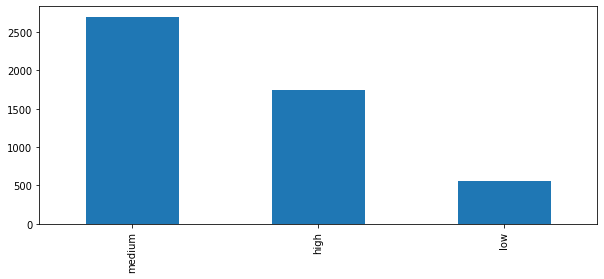

In [ ]:
plt.figure(figsize=(10,4))

data.label.value_counts().plot(kind='bar');

In [ ]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)

X_tfidf = tfidf_vect.fit_transform(data['text'].astype('U').values)

# columns = tfidf_vect.get_feature_names_out()
X_features = pd.DataFrame(X_tfidf.toarray())
X_features.head()

,0,1,2,3,4,5,6,7,8,9,...,31932,31933,31934,31935,31936,31937,31938,31939,31940,31941
0,0.013672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.018298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.021528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.018173,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.016291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Concatenate new features to the TF-IDF vectors

In [ ]:
X_features = pd.concat([data['average_word_length'], data['punct%'],data['TTR'],data['paragraphs_count'],pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,average_word_length,punct%,TTR,paragraphs_count,0,1,2,3,4,5,...,31932,31933,31934,31935,31936,31937,31938,31939,31940,31941
0,5.052083,2.1,-0.808979,4,0.013672,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.124611,1.4,-0.851460,2,0.018298,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5.616667,2.2,-0.558228,4,0.021528,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.449568,2.7,-0.678841,6,0.018173,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.335244,1.2,-0.824634,6,0.016291,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Split the dataset into train/test

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2, random_state=42)

Logistic Regressions Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
import warnings
warnings.filterwarnings("ignore")

lr = LogisticRegression()
lr_model = lr.fit(X_train, y_train)

In [ ]:
y_pred = lr_model.predict(X_test)

*1.Evaluate the model*

In [ ]:
precision, recall, fscore, support = score(y_test, y_pred, average='weighted')

print('Accuracy: {} / Precision: {} / Recall: {} / F1 Score: {}'.format(round((y_pred==y_test).sum() / len(y_pred),3),
                                                            round(precision, 3),
                                                            round(recall, 3),
                                                            round(fscore, 3)))

Accuracy: 0.662 / Precision: 0.692 / Recall: 0.662 / F1 Score: 0.629


*2. Details Metrics*

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[219,   1, 147],
       [  1,   7, 103],
       [ 86,   0, 436]])

In [ ]:
from sklearn.metrics import classification_report
target_names = ['High','Medium','Low']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        High       0.72      0.60      0.65       367
      Medium       0.88      0.06      0.12       111
         Low       0.64      0.84      0.72       522

    accuracy                           0.66      1000
   macro avg       0.74      0.50      0.50      1000
weighted avg       0.69      0.66      0.63      1000



Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import warnings
warnings.filterwarnings("ignore")

rf = RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
precision, recall, fscore, support = score(y_test, y_pred, average='weighted')

print('Accuracy: {} / Precision: {} / Recall: {} / F1 Score: {}'.format(round((y_pred==y_test).sum() / len(y_pred),3),
                                                            round(precision, 3),
                                                            round(recall, 3),
                                                            round(fscore, 3)))

Accuracy: 0.614 / Precision: 0.721 / Recall: 0.614 / F1 Score: 0.546


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[109,   0, 258],
       [  0,   4, 107],
       [ 21,   0, 501]])

In [ ]:
from sklearn.metrics import classification_report
target_names = ['High','Medium','Low']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        High       0.84      0.30      0.44       367
      Medium       1.00      0.04      0.07       111
         Low       0.58      0.96      0.72       522

    accuracy                           0.61      1000
   macro avg       0.81      0.43      0.41      1000
weighted avg       0.72      0.61      0.55      1000



SVM

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = clf.predict(X_test)

Multinomial 

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
import warnings
warnings.filterwarnings("ignore")

mnb = MultinomialNB()
mnb_model = mnb.fit(X_train, y_train)

ValueError: ignored

In [ ]:
y_pred = mnb_model.predict(X_test)

In [ ]:
precision, recall, fscore, support = score(y_test, y_pred, average='weighted')

print('Accuracy: {} / Precision: {} / Recall: {} / F1 Score: {}'.format(round((y_pred==y_test).sum() / len(y_pred),3),
                                                            round(precision, 3),
                                                            round(recall, 3),
                                                            round(fscore, 3)))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['High','Medium','Low']
print(classification_report(y_test, y_pred, target_names=target_names))

Hyperparamter Tuning

In [ ]:
RandomForestClassifier().get_params()

In [ ]:
rf = RandomForestClassifier(n_estimators=10, max_depth=10, n_jobs=-1, random_state = 42)
rf_model = rf.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

target_names = ['High','Medium','Low']
print(classification_report(y_test, y_pred, target_names=target_names))

Grid Search Cross Validation

In [ ]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators=n_est, max_depth=depth, n_jobs=-1, random_state = 42)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, average='weighted')
    print('Est: {} / Depth: {} ---- Precision: {} / Recall: {} / Accuracy: {}'.format(
        n_est, depth, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [ ]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, None]:
        train_RF(n_est, depth)